In [2]:
import librosa
import numpy as np
import librosa.display
import matplotlib.pyplot as plt

In [3]:
fileTargest = open("targets.tsv", "r")
targets = fileTargest.readlines()
Dict = {}
for line in targets:
    L = line.split("\n")[0]
    ID,y = L.split("	")
    Dict[ID] = int(y)   
fileTargest.close()

In [4]:
sequences_sr_ID = []
sequences = []
sexes = []

In [5]:
import os
files = []
folder = "train"
for file in os.listdir(folder):
    files.append(folder+"\\"+file)  

In [32]:
def addPredicats(start,end):
    global files, sequences, sexes, Dict
    for i in range(start,end):
        fil = files[i]
        seq, sr = librosa.load(fil)
        ID = fil.split('\\')[1].split('.')[0]
        sequences_sr_ID.append([seq,sr,ID])
        sequences.append(seq)
        sexes.append(Dict[ID])
        print(i)

In [8]:
addPredicats(0,100)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [9]:
def standartise_sequence(sequence): 
    standartLength = 40000
    
    standart = np.zeros(standartLength,dtype=float)
    
    seqLen = sequence.shape[0]
    
    if seqLen <= standartLength:
        d = standartLength - seqLen
        if d%2 == 0:
            standart[d//2:standartLength-d//2] = sequence
        else:
            standart[d//2:standartLength-1-d//2] = sequence
    else:
        d = seqLen - standartLength
        standart = sequence[seqLen//2-standartLength//2:seqLen//2+standartLength//2]
        
    return standart


In [10]:
standartise_sequences = []

for i in range(len(sequences)):
    standartise_sequences.append(standartise_sequence(sequences[i]))
    

In [11]:
n = 100
x_train_list = []
x_train_abs_list = []
y_train_list = sexes[0:n]

for i in range(n):
    
    S = librosa.feature.melspectrogram(standartise_sequences[i], sr=sequences_sr_ID[i][1], n_mels=128,fmax=8000)
    S_dB = librosa.power_to_db(S, ref=np.max)
    x_train_list.append(S_dB)
    x_train_abs_list.append(S)
    print(S_dB.shape)
    

(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)


[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

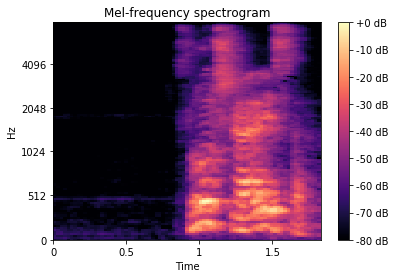

In [12]:
fig, ax = plt.subplots()

img = librosa.display.specshow(x_train_list[24], x_axis='time',

                         y_axis='mel', sr=sequences_sr_ID[24][1],

                         fmax=8000, ax=ax)

fig.colorbar(img, ax=ax, format='%+2.0f dB')

ax.set(title='Mel-frequency spectrogram')

In [13]:
from tensorflow.keras.utils import to_categorical

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [14]:
y_train = to_categorical(y_train_list, 2)

In [15]:
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, BatchNormalization, Dropout, LeakyReLU, Activation
from tensorflow.keras.optimizers import Adam

In [16]:
NUM_CLASSES = 2

In [21]:
input_layer = Input((128, 79, 1))

x = Conv2D(filters = 20, kernel_size = 6, strides = 4, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x) # 1


x = Conv2D(filters = 10, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x) # 2

x = Conv2D(filters = 5, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x) # 3

'''
x = Conv2D(filters = 20, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x) # 4
'''

x = Flatten()(x) 
x = Dense(20)(x) # layer of perceptrons

x = BatchNormalization()(x) # пакетная нормализация чтобы веса не взлетели

x = LeakyReLU()(x) # в качестве активации

x = Dropout(rate = 0.5)(x) # как я понял слой прореживания

x = Dense(NUM_CLASSES)(x)

output_layer = Activation('softmax')(x) # в качестве активации на последнем слое

model = Model(input_layer, output_layer)

In [22]:
opt = Adam(learning_rate=0.0005)
model.compile(loss="mean_squared_error", optimizer=opt, metrics=['accuracy'])

In [23]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 79, 1)]      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 20, 20)        740       
_________________________________________________________________
batch_normalization_4 (Batch (None, 32, 20, 20)        80        
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 32, 20, 20)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 10, 10)        1810      
_________________________________________________________________
batch_normalization_5 (Batch (None, 16, 10, 10)        40        
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 16, 10, 10)        0   

In [24]:
x_train = np.array(x_train_list)
print(x_train.shape)

(100, 128, 79)


In [25]:
y_train.shape

(100, 2)

In [26]:
history = model.fit(x_train, y_train, batch_size = 32, epochs = 10, shuffle = True)

Epoch 1/10
4/4 [==============================] - 3s 62ms/step - loss: 0.3519 - accuracy: 0.4821
Epoch 2/10
4/4 [==============================] - 0s 34ms/step - loss: 0.2914 - accuracy: 0.5844
Epoch 3/10
4/4 [==============================] - 0s 22ms/step - loss: 0.3081 - accuracy: 0.5481
Epoch 4/10
4/4 [==============================] - 0s 23ms/step - loss: 0.2576 - accuracy: 0.6039
Epoch 5/10
4/4 [==============================] - 0s 28ms/step - loss: 0.2688 - accuracy: 0.5737
Epoch 6/10
4/4 [==============================] - 0s 23ms/step - loss: 0.2722 - accuracy: 0.6110
Epoch 7/10
4/4 [==============================] - 0s 23ms/step - loss: 0.2224 - accuracy: 0.6920
Epoch 8/10
4/4 [==============================] - 0s 23ms/step - loss: 0.2596 - accuracy: 0.6135
Epoch 9/10
4/4 [==============================] - 0s 23ms/step - loss: 0.1962 - accuracy: 0.6888
Epoch 10/10
4/4 [==============================] - 0s 23ms/step - loss: 0.1840 - accuracy: 0.7145


In [27]:
# my_x_test = x_train[9000:13936]
# my_x_test.shape

In [28]:
#preds = model.predict(my_x_test) 

In [29]:
#my_y_test = y_train[9000:13936]

In [30]:
import os
files_test = []
folder_test = "test"
for file in os.listdir(folder_test):
    files_test.append(folder_test+"\\"+file)  

In [31]:
len(files_test)

3413

In [39]:
testIDs = []
test_list = []
standartised_test_list = []
test_seq_sr_list = []

In [40]:
def add_Testing_Predicats(start,end):
    global files_test, testIDs, test_list
    for i in range(start,end):
        fil = files_test[i]
        seq, sr = librosa.load(fil)
        ID = fil.split('\\')[1].split('.')[0]
        testIDs.append(ID)
        test_seq_sr_list.append([seq,sr])
        test_list.append(seq)
        print(i)

In [41]:
add_Testing_Predicats(0,500)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [42]:

for i in range(len(test_list)):
    standartised_test_list.append(standartise_sequence(test_list[i]))
    

In [44]:
x_test_list = []

for i in range(len(standartised_test_list)):
    S = librosa.feature.melspectrogram(standartised_test_list[i], sr=test_seq_sr_list[i][1], n_mels=128,fmax=8000)
    S_dB = librosa.power_to_db(S, ref=np.max)
    x_test_list.append(S_dB)
    print(S_dB.shape)
    

(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)
(128, 79)


In [45]:
x_test = np.array(x_test_list)
print(x_test.shape)

(500, 128, 79)


In [46]:
preds = model.predict(x_test) 

In [77]:
np.argmax(preds[32],axis = -1)

0

In [86]:
ans = []
for i in range(len(standartised_test_list)):
    p = np.argmax(preds[i],axis = -1)
    ans.append([testIDs[i],str(p)])
    print(*[testIDs[i],p])
a = np.asarray(ans)
np.savetxt("predictionYndex.csv", a, fmt="%10s , %10s", delimiter=",")

00100026dbdffcd01cde6ee9b9a9d273 1
0014278276a6cc05fe8c522af0a677df 0
0026e20266ceba9cdda2c116e89d2f3b 1
008b37fc832d3dfad9105961c5801c02 0
00b1d7d0d6fdb25050041f6e2ae2871e 1
00b23e5cbc6f652b55d0754ed5ce300f 1
00d314de185e2e2425590e18e88c969f 1
00d9d606720bf95d08546c4bcb19ba71 0
00f3de3001b7f177384897278f905f83 0
0113ca85c57aeafd828acc1e765c058b 0
011ffa717faf73648cd2bc746d2ef9d7 1
012d337e20f5427f550163b486f7ca00 1
0148a8055c5987082bf1fd1d816943ac 0
0166018d693bb79c1e6203d4a048b003 0
016d86a309e33615738e0af7abdc7dc8 0
017e03b789bef812d30b2e5783bbfdf2 0
018205a4a74a654927ff80ca4ba892d7 0
0197e87b1967402d4f331e656d5aa04d 0
01a14dbda7060f8b654f4a81566ecb0e 1
01a488d98948d02d376ea8848f92036f 0
01a4e8ff8bd45861e6da907f97b6f024 0
01bde3f1091f5982c0c15da9cab2ccf7 1
01d68545cdd3ecfe9fc4d23f507245a5 0
01edf1b74fb4c52ed07e2eb6f0f9ddcc 0
02047926236d84ebc92c66d66cf29a89 0
0231bdb6494f15b1eb7359e33da3ac7b 0
02414b7de4171ac996fc57f9b87e97c4 0
026e86cf42e441fb527f8a0d71a83838 0
027afb849889ea82d0a3

In [87]:
# anses = []
# for i in range(len(standartised_test_list)):
#     p = np.argmax(preds[i],axis = -1)
#     anses.append(str(p))
#     print(*[testIDs[i],p])

# names = np.array(testIDs)
# ans = np.array(anses)
# a = np.zeros(names.size,  dtype=[('key_name', 'U6'), ('RT', 'U6')])

# a['key_name'] = names
# a['RT'] = ans

# np.savetxt("predictionYndex.txt", a, fmt="%10s , %10s", delimiter="\t")